# Project: Wind Speed And Weather Analysis – Mace Head
Wind Speed and Weather Analysis (Met Éireann – Mace Head)
This Jupyter-style notebook demonstrates data cleaning, analysis,
and exploratory insights relevant to wind energy assessment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("mly275.csv", skiprows=19)

print(df.head(20))

    year  month meant maxtp mintp mnmax mnmin   rain  gmin  wdsp  maxgt sun
0   2003     11   9.7  16.0   2.8  11.8   7.6  128.1   0.1  17.6     60    
1   2004      1   7.1  11.6  -0.3   9.4   4.9  141.7  -3.1  16.2     64    
2   2004      2   6.5  12.3  -0.9   9.0   4.1         -3.6  13.1     54    
3   2004      3   7.8  13.5   1.6  10.2   5.4         -3.0  16.0     69    
4   2004      4   9.4  14.1   2.1  11.8   7.0   73.1  -0.7  15.1     58    
5   2004      5  11.7  19.2   5.8  14.4   9.1   27.8   0.8  12.3     58    
6   2004      6  13.9  20.8   8.3  16.1  11.7   59.9   3.0  14.2     43    
7   2004      8  15.7  21.8   9.2  18.4  13.0          6.6  12.2     44    
8   2004      9  14.3  22.7   7.9  16.3  12.3   85.2   4.9  18.1     55    
9   2004     10   9.9  14.7   2.5  12.4   7.4  120.0   2.6  14.8     52    
10  2004     11   9.7  12.4   1.1  11.2   8.3   57.5  -1.4  14.2     46    
11  2004     12   8.4  12.0   1.0  10.3   6.5  101.2  -2.2  19.0     57    
12  2005    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    260 non-null    int64 
 1   month   260 non-null    int64 
 2   meant   260 non-null    object
 3   maxtp   260 non-null    object
 4   mintp   260 non-null    object
 5   mnmax   260 non-null    object
 6   mnmin   260 non-null    object
 7   rain    260 non-null    object
 8   gmin    260 non-null    object
 9   wdsp    260 non-null    object
 10  maxgt   260 non-null    int64 
 11  sun     260 non-null    object
dtypes: int64(3), object(9)
memory usage: 24.5+ KB


In [3]:
cleandf = df[["month","wdsp"]]
print(cleandf.head(5))

   month  wdsp
0     11  17.6
1      1  16.2
2      2  13.1
3      3  16.0
4      4  15.1


In [4]:
cleandf['wdsp']= cleandf.loc[:,('wdsp')].replace(' ', np.nan)
cleandf.dropna(inplace=True)

C:\Users\OrangH\AppData\Local\Temp\ipykernel_43780\2973276192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['wdsp']= cleandf.loc[:,('wdsp')].replace(' ', np.nan)
C:\Users\OrangH\AppData\Local\Temp\ipykernel_43780\2973276192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.dropna(inplace=True)


In [5]:
cleandf['wdsp'] = cleandf['wdsp'].astype(float)

C:\Users\OrangH\AppData\Local\Temp\ipykernel_43780\1988402417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['wdsp'] = cleandf['wdsp'].astype(float)


In [6]:
corrwind = cleandf["month"].corr(cleandf["wdsp"])
print(f"wind correlation {corrwind}")

wind correlation 0.11616199744063899


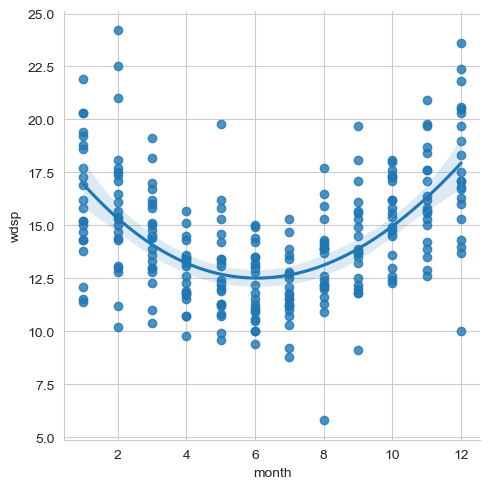

In [7]:
sns.set_style('whitegrid')
sns.lmplot(x='month' , y ='wdsp', order=3, data=cleandf)
plt.show()

In [8]:
columns = [
'year', 'month', 'meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'rain', 'gmin', 'wdsp', 'maxgt', 'sun'
]

In [9]:
# Ensure the columns in the list exist in the dataframe before converting
for col in columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column '{col}' does not exist in the dataframe.")

In [10]:
# Remove rows without year or month
df = df.dropna(subset=['year', 'month'])

In [11]:
# Create datetime column
df['date'] = pd.to_datetime(dict(year=df.year, month=df.month, day=1))

In [12]:
# Summary statistics for wind speed

df['wdsp'].describe()

count    258.000000
mean      14.466667
std        2.968049
min        5.800000
25%       12.300000
50%       14.200000
75%       16.200000
max       24.200000
Name: wdsp, dtype: float64

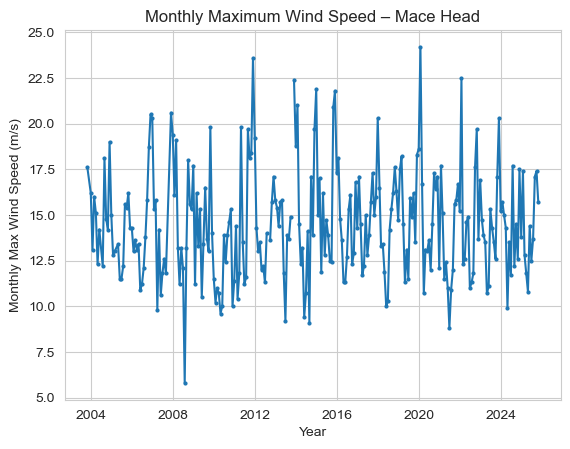

In [13]:
#  Wind Speed Over Time
plt.figure()
plt.plot(df['date'], df['wdsp'], marker='o', linestyle='-', markersize=2)
plt.xlabel('Year')
plt.ylabel('Monthly Max Wind Speed (m/s)')
plt.title('Monthly Maximum Wind Speed – Mace Head')
plt.show()

In [14]:
# Seasonal wind analysis
df['season'] = df['month'] % 12 // 3 + 1 # Seasons: 1: Winter, 2: Spring, 3: Summer, 4: Autumn
seasonal_wind = df.groupby('season')['wdsp'].mean()
seasonal_wind

season
1    16.678462
2    13.433846
3    12.455385
4    15.325397
Name: wdsp, dtype: float64

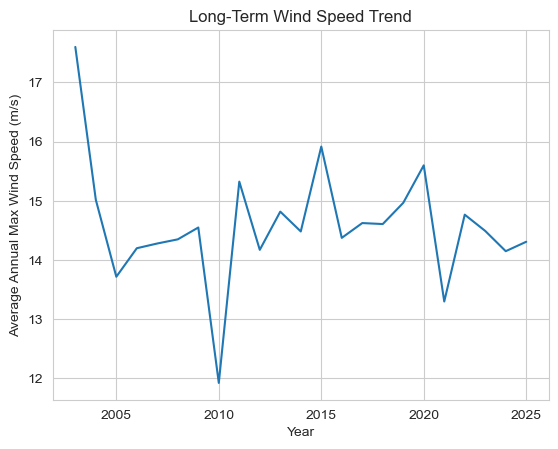

In [15]:
# Long-term trend analysis
annual_wind = df.groupby('year')['wdsp'].mean()

plt.figure()
plt.plot(annual_wind.index, annual_wind.values)
plt.xlabel('Year')
plt.ylabel('Average Annual Max Wind Speed (m/s)')
plt.title('Long-Term Wind Speed Trend')
plt.show()

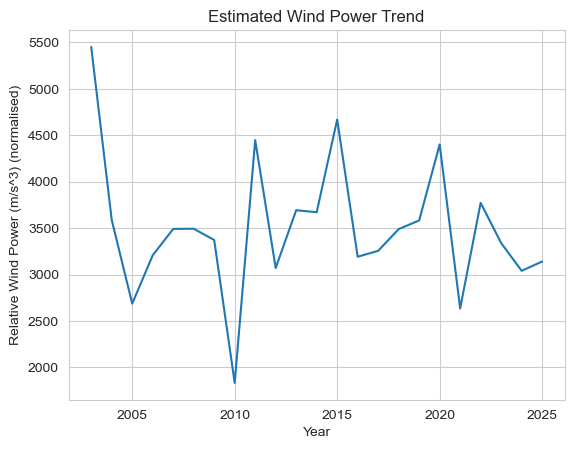

In [19]:
# Simple Wind Power Estimation
# Wind power is proportional to the cube of wind speed
# P ~ v^3 (normalised)

# Use max monthly wind speed as a proxy
df['relative_power'] = df['wdsp'] ** 3

annual_power = df.groupby('year')['relative_power'].mean()


plt.figure()
plt.plot(annual_power.index, annual_power.values)
plt.xlabel('Year')
plt.ylabel('Relative Wind Power (m/s^3) (normalised)')
plt.title('Estimated Wind Power Trend')
plt.show()


In [17]:
# Wind Turbine Operating Range (Simplified)

# Typical onshore turbine limits (m/s)
cut_in = 3
cut_out = 25


operational = df[(df['wdsp'] >= cut_in) & (df['wdsp'] <= cut_out)]
operational_fraction = len(operational) / len(df)
operational_fraction

0.9923076923076923

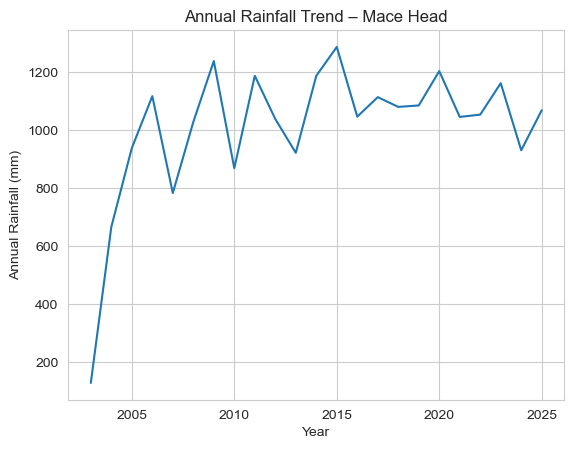

In [18]:
# Other Weather Metric: Rainfall

annual_rain = df.groupby('year')['rain'].sum()

plt.figure()
plt.plot(annual_rain.index, annual_rain.values)
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.title('Annual Rainfall Trend – Mace Head')
plt.show()